In [38]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt # for data visualization
import seaborn as sns # for data visualization
import plotly.express as px # for data visualization
import warnings
warnings.filterwarnings('ignore')

In [39]:
df = pd.read_csv('../data_gathering/Leetcode_Questions_updated (2024-11-02).csv')
df.sample(3)

,Question_No,Question,Topic_tags,Acceptance_rate,isPremium,Difficulty,Question_Link,Solution
1592,1593,Split a String Into the Max Number of Unique ...,"['Hash Table', 'String', 'Backtracking']",68.20%,False,Medium,https://leetcode.com/problems/split-a-string-i...,https://leetcode.com/problems/split-a-string-i...
1394,1395,Count Number of Teams,"['Array', 'Dynamic Programming', '2+']",70.10%,False,Medium,https://leetcode.com/problems/count-number-of-...,https://leetcode.com/problems/count-number-of-...
896,897,Increasing Order Search Tree,"['Stack', 'Tree', 'Depth-First Search', '2+']",78.50%,False,Easy,https://leetcode.com/problems/increasing-order...,https://leetcode.com/problems/increasing-order...


### Univariate Analysis

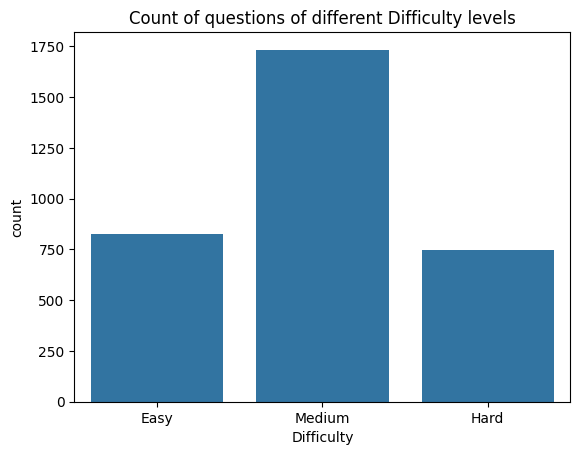

In [40]:
sns.countplot(data=df, x='Difficulty')
_ = plt.title('Count of questions of different Difficulty levels')

Text(0.5, 1.0, 'Percentage of difficulty level of questions in leetcode')

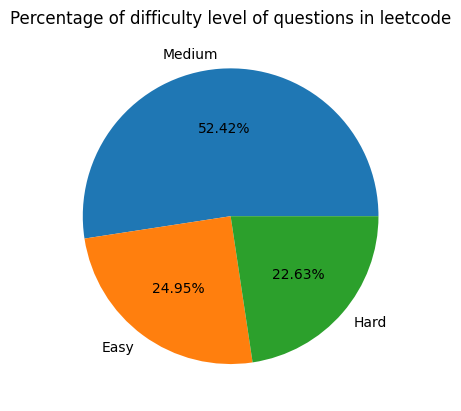

In [41]:
_ = plt.pie(df['Difficulty'].value_counts(),labels=['Medium','Easy','Hard'],autopct='%1.2f%%')
plt.title('Percentage of difficulty level of questions in leetcode')

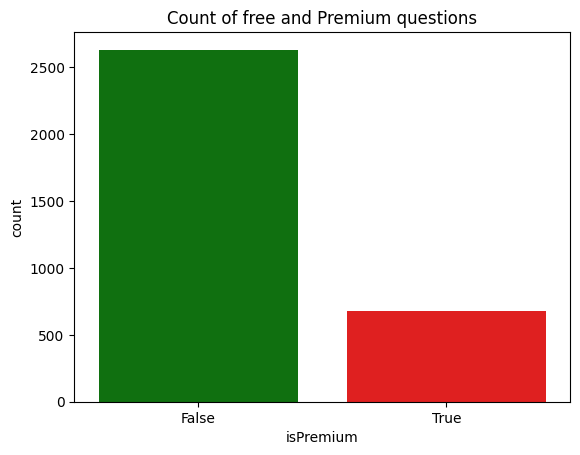

In [42]:
sns.countplot(data=df, x='isPremium',palette=['green','red'])
_ = plt.title('Count of free and Premium questions')

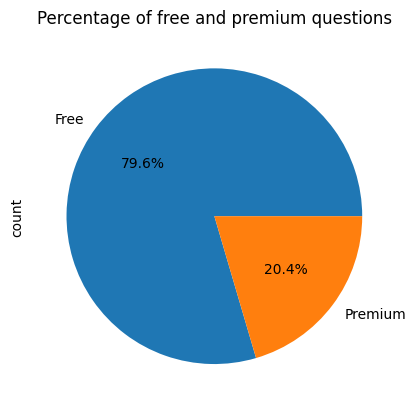

In [43]:
_ = df['isPremium'].value_counts().plot(kind='pie',labels=['Free','Premium'],autopct='%0.1f%%',title='Percentage of free and premium questions')

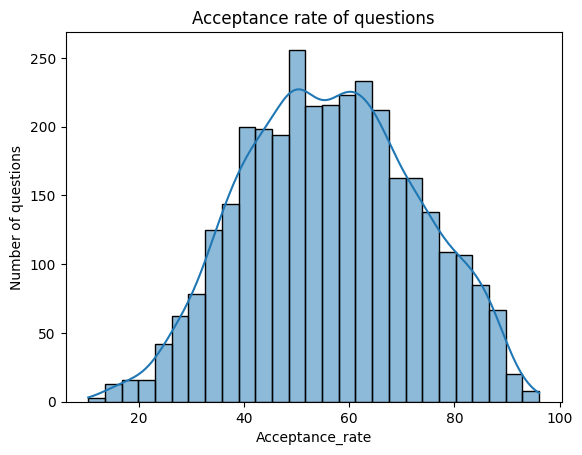

In [44]:
df['Acceptance_rate'] = df['Acceptance_rate'].apply(lambda x : x[:-1]).astype('float')
sns.histplot(df['Acceptance_rate'],kde=True)
plt.title('Acceptance rate of questions')
_ = plt.ylabel('Number of questions')

In [45]:
unique_topics = dict()

for topic_lists in df['Topic_tags']:
    for topic in eval(topic_lists):
        if '+' not in topic:
            if topic not in unique_topics:
                unique_topics[topic] = 1
            else:
                unique_topics[topic] += 1

unique_topics = dict(sorted(unique_topics.items(), key=lambda item: item[1], reverse=True)[:15])

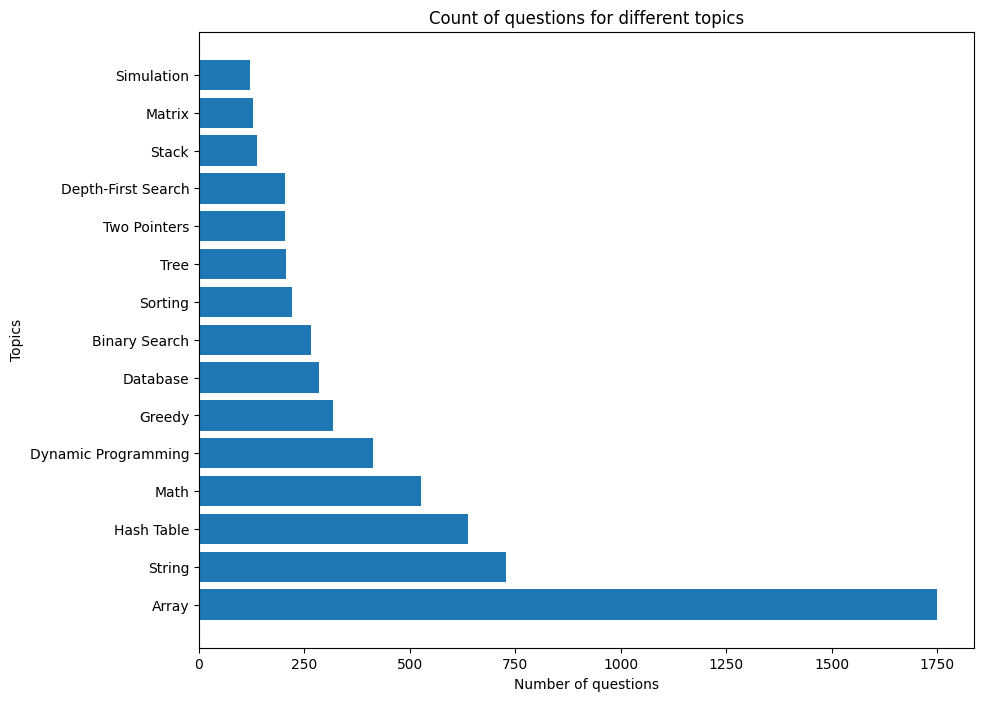

In [46]:
plt.figure(figsize=(10,8))
plt.barh(y=unique_topics.keys(),width=unique_topics.values())
plt.title('Count of questions for different topics')
plt.xlabel('Number of questions')
_ = plt.ylabel('Topics')

In [47]:
temp = pd.DataFrame(data=unique_topics.values(), index=unique_topics.keys()).reset_index().rename(columns={'index':'topics',0:'Question Count'})

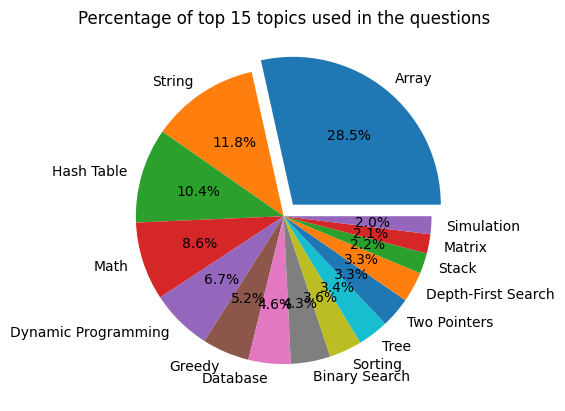

In [48]:
_ =plt.pie(x=unique_topics.values(), labels=unique_topics.keys(), autopct='%0.1f%%',explode=[0.1,0,0,0,0,0,0,0,0,0,0,0,0,0,0])
_ = plt.title('Percentage of top 15 topics used in the questions')

In [49]:
import re
def topic_counts(topic_list):
    
    extra_topic = re.findall('\d\+',topic_list)
    topic_count = len(eval(topic_list))
    
    if(extra_topic):
        topic_count = topic_count - 1 + int(extra_topic[0][0])
    
    return topic_count

topic_count = df['Topic_tags'].apply(topic_counts)
df.insert(3,'Topic_count',topic_count)

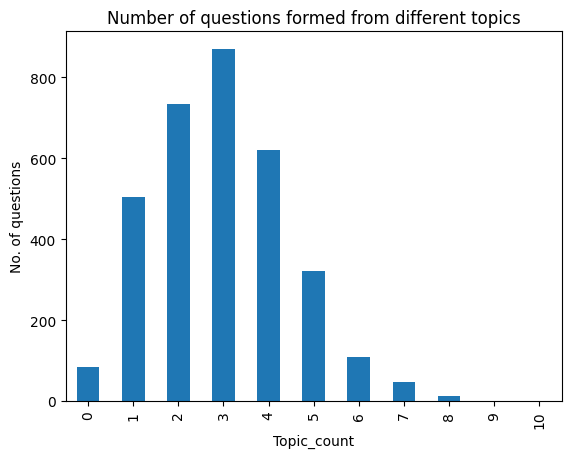

In [50]:
df['Topic_count'].value_counts().sort_index().plot(kind='bar')
plt.ylabel('No. of questions')
_ = plt.title('Number of questions formed from different topics')

### Bivariate Analysis

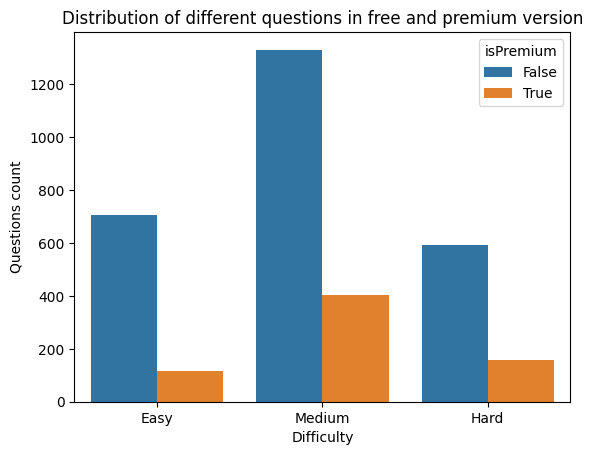

In [51]:
sns.countplot(data=df,x='Difficulty',hue='isPremium')
plt.ylabel('Questions count')
_ =  plt.title('Distribution of different questions in free and premium version')

In [52]:
pd.crosstab(index=df['isPremium'], columns=df['Difficulty'])

Difficulty,Easy,Hard,Medium
isPremium,,,
False,707,592,1331
True,118,156,402


Difficulty   Easy  Hard  Medium
Topic_count                    
0              45     7      33
1             239    66     199
2             250   131     353
3             174   171     525
4              84   174     362
5              27   116     179
6               5    49      54
7               1    24      23
8               0     9       4
9               0     0       1
10              0     1       0


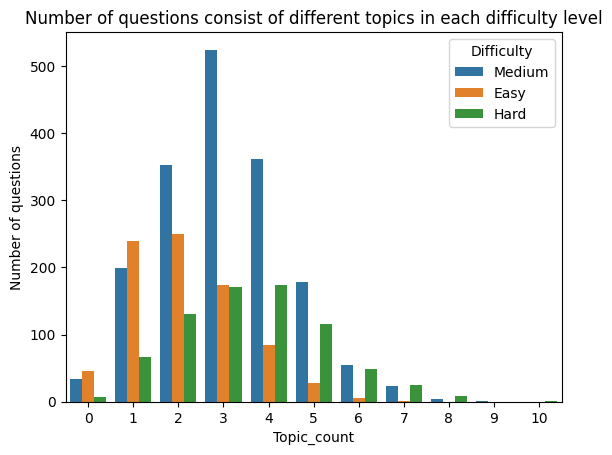

In [53]:
print(pd.crosstab(index=df['Topic_count'],columns=df['Difficulty']))

sns.countplot(data=df, x='Topic_count',hue='Difficulty')
plt.ylabel('Number of questions')
_ = plt.title('Number of questions consist of different topics in each difficulty level')

Based on the bar chart, we can make a few observations:

#### `Topic Count Concentration` 

Most questions are associated with lower topic counts (between 1 and 5). There’s a clear peak around topic_count values of 2, 3, and 4, indicating that questions with these topic counts are the most common.
Very few questions have a topic count higher than 6, suggesting that questions rarely cover a wide range of topics.

#### `Difficulty Level Distribution:` 
Easy questions are more common at lower topic counts (1 and 2) but decrease significantly as topic count increases.
Medium questions dominate across most topic counts, particularly around 2, 3, and 4, suggesting that medium-difficulty questions are more balanced across a variety of topic counts.
Hard questions are less frequent but start to become more common from a topic count of 3 and above. This suggests that harder questions might tend to cover more topics compared to easy questions.

#### `Difficulty vs. Topic Count:` 
The chart suggests a trend where as the number of topics increases, the likelihood of questions being classified as hard also increases, while easy questions are more common when the topic count is low.
This may indicate that covering more topics makes questions inherently more challenging, or it could reflect the structure of the questions in this dataset.

#### `Skewed Distribution:` 
The distribution of topic counts is right-skewed, meaning that questions with higher topic counts (7 or more) are rare.
This could imply that most questions are designed to focus on a few topics rather than covering a broad range, which might be suitable for targeted assessment
.
#### `Summary` 
The chart indicates that most questions are of medium difficulty and cover a limited number of topics (primarily between 2 and 4). Easy questions tend to cover fewer topics, while hard questions are more evenly distributed and increase in frequency as topic count rises. This pattern could reflect a design choice where covering more topics tends to increase the difficulty level of questions.

In [54]:
df[['Topic_tags','Topic_count','Acceptance_rate','isPremium','Difficulty']]

,Topic_tags,Topic_count,Acceptance_rate,isPremium,Difficulty
0,"['Array', 'Hash Table']",2,54.1,False,Easy
1,"['Linked List', 'Math', 'Recursion']",3,44.5,False,Medium
2,"['Hash Table', 'String', 'Sliding Window']",3,35.7,False,Medium
3,"['Array', 'Binary Search', '1+']",3,41.8,False,Hard
4,"['Two Pointers', 'String', '1+']",3,34.7,False,Medium
...,...,...,...,...,...
3301,"['Hash Table', 'Math', 'String', '2+']",5,24.9,False,Medium
3302,"['Array', 'Math', '2+']",4,38.0,False,Hard
3303,"['Hash Table', 'Math', 'String', '2+']",5,31.1,False,Hard
3304,['Database'],1,96.1,True,Medium


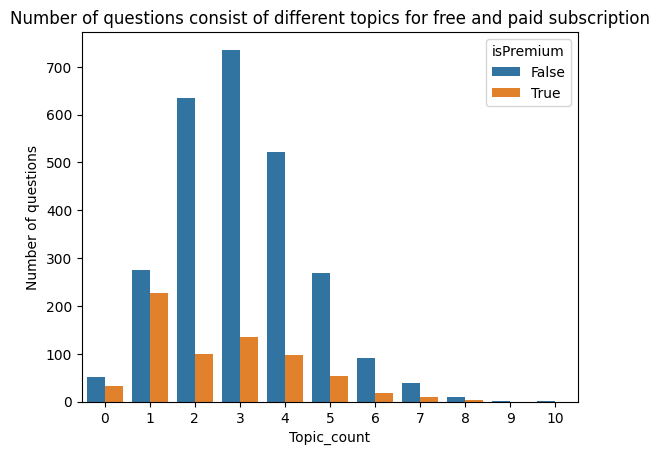

In [55]:
sns.countplot(data=df, x='Topic_count',hue='isPremium')
plt.ylabel('Number of questions')
_ = plt.title('Number of questions consist of different topics for free and paid subscription')

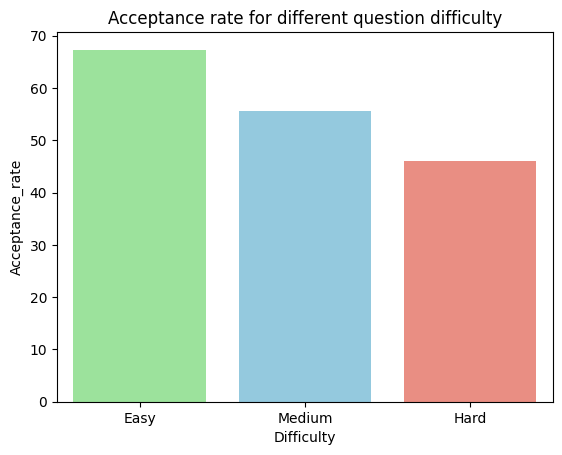

In [56]:
palette = ['lightgreen','skyblue','salmon']
sns.barplot(data=df, x='Difficulty', y='Acceptance_rate', estimator='mean',errorbar=None, palette=palette)
_ = plt.title('Acceptance rate for different question difficulty')

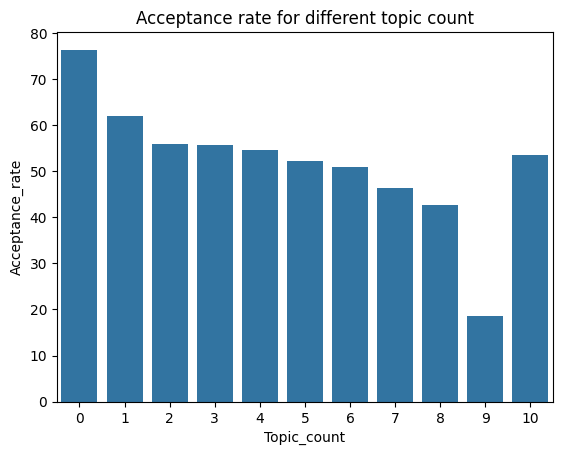

In [57]:
sns.barplot(data=df, x='Topic_count', y='Acceptance_rate', estimator='mean',errorbar=None)
_ = plt.title('Acceptance rate for different topic count')

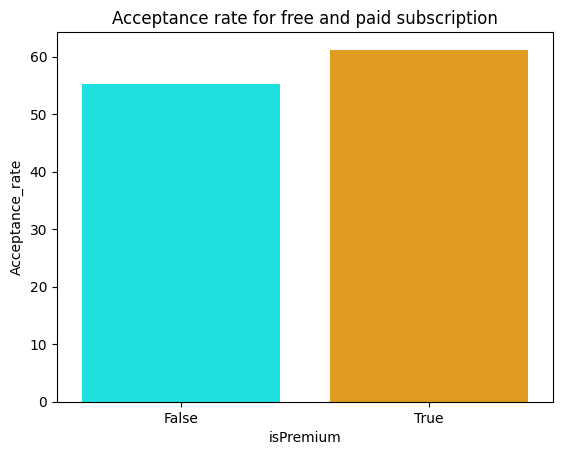

In [58]:
sns.barplot(data=df, x='isPremium', y='Acceptance_rate', estimator='mean',errorbar=None, palette=['aqua','orange'])
_ = plt.title('Acceptance rate for free and paid subscription')

In [ ]:
from nltk import bigrams, trigrams
from collections import Counter
import nltk


# Function to generate bigrams and trigrams
def generate_ngrams(text, n=2):
    tokens = text.split()
    if n == 2:
        return list(bigrams(tokens))
    elif n == 3:
        return list(trigrams(tokens))
    return []

# Count bigrams
bigram_counts = Counter()
for text in df['Topic_tags']:
    bigram_counts.update(generate_ngrams(text, 2))

# Count trigrams
# trigram_counts = Counter()
# for text in df['topic_tags']:
#     trigram_counts.update(generate_ngrams(text, 3))

# Convert counters to DataFrames for better visualization
bigram_df = pd.DataFrame(bigram_counts.items(), columns=['Bigram', 'Count']).sort_values(by='Count', ascending=False)
# trigram_df = pd.DataFrame(trigram_counts.items(), columns=['Trigram', 'Count']).sort_values(by='Count', ascending=False)


AttributeError: 'list' object has no attribute 'split'

In [61]:
bigram_df

,Bigram,Count
0,"(['Array',, 'Hash)",418
41,"('Hash, Table',)",385
50,"(['Array',, 'Dynamic)",223
5,"(['Hash, Table',)",219
16,"('Dynamic, Programming',)",207
...,...,...
237,"(Table',, '6+'])",1
236,"(Search',, 'Breadth-First)",1
475,"(Manipulation',, 'Simulation'])",1
476,"(Pointers',, 'Union)",1
